# Florida Government Forms AI Assistant - FIXED VERSION

## This version creates HIGHLY DISTINCTIVE images that the CNN can learn!

---

In [1]:
# Install & Import
!pip install -q tensorflow opencv-python pillow scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import cv2
from PIL import Image, ImageDraw, ImageFont
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

print(f"✅ TensorFlow {tf.__version__}")
print(f"✅ GPU: {len(tf.config.list_physical_devices('GPU')) > 0}")

✅ TensorFlow 2.19.0
✅ GPU: False


## ✅ Create HIGHLY DISTINCTIVE Synthetic Forms

In [2]:
def create_distinctive_form(form_type, img_size=(128, 128), seed=None):
    """
    Create VERY distinctive synthetic forms that are easy to classify.
    Each form type has completely unique visual patterns.
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    img = np.ones(img_size, dtype=np.uint8) * 255

    if form_type == 0:  # LICENSE - Horizontal lines + photo box
        # Bold header
        cv2.rectangle(img, (5, 5), (123, 20), 0, -1)
        # Photo box (distinctive!)
        cv2.rectangle(img, (10, 25), (45, 60), 0, 3)
        # Many horizontal lines (like form fields)
        for i in range(30, 120, 8):
            cv2.line(img, (50, i), (118, i), 0, 1)
        # Signature line at bottom
        cv2.line(img, (10, 110), (118, 110), 0, 2)
        cv2.putText(img, 'X', (15, 108), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 0, 1)

    elif form_type == 1:  # REGISTRATION - Grid pattern
        # Dense grid (very distinctive!)
        for i in range(10, 120, 15):
            cv2.line(img, (10, i), (118, i), 0, 1)  # Horizontal
            cv2.line(img, (i, 10), (i, 118), 0, 1)  # Vertical
        # Bold border
        cv2.rectangle(img, (8, 8), (120, 120), 0, 2)
        # Fill some cells
        cv2.rectangle(img, (12, 12), (24, 24), 100, -1)
        cv2.rectangle(img, (27, 12), (39, 24), 100, -1)

    elif form_type == 2:  # TITLE - Large boxes with diagonal
        # Large box at top
        cv2.rectangle(img, (10, 10), (118, 45), 0, 2)
        cv2.line(img, (10, 10), (118, 45), 0, 1)  # Diagonal!
        # Two boxes below
        cv2.rectangle(img, (10, 50), (62, 85), 0, 2)
        cv2.rectangle(img, (66, 50), (118, 85), 0, 2)
        # Bottom section
        cv2.rectangle(img, (10, 90), (118, 118), 0, 2)
        # Cross pattern (distinctive!)
        cv2.line(img, (64, 50), (64, 85), 0, 2)

    elif form_type == 3:  # PERMIT - Vertical bars + header
        # Bold black header (very distinctive!)
        cv2.rectangle(img, (5, 5), (123, 25), 0, -1)
        # Vertical bars/columns
        for i in range(20, 120, 25):
            cv2.line(img, (i, 30), (i, 118), 0, 2)
        # Numbers in columns
        for i, x in enumerate(range(10, 110, 25)):
            cv2.putText(img, str(i+1), (x, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 0, 1)

    else:  # ID - Card-like with circle
        # Outer card border (thick)
        cv2.rectangle(img, (15, 15), (113, 113), 0, 4)
        # Circle for photo (very distinctive!)
        cv2.circle(img, (40, 50), 20, 0, 2)
        # Horizontal bars on right
        for i in range(35, 90, 10):
            cv2.rectangle(img, (65, i), (108, i+5), 0, -1)
        # Bottom stripe
        cv2.rectangle(img, (20, 95), (108, 105), 0, -1)

    return img


def add_variations(img, variation_level=1):
    """
    Add MINIMAL variations to keep images distinctive.
    """
    pil_img = Image.fromarray(img)

    # Slight rotation only
    angle = random.uniform(-2, 2) * variation_level
    pil_img = pil_img.rotate(angle, fillcolor=255)

    # Minimal brightness change
    from PIL import ImageEnhance
    brightness = ImageEnhance.Brightness(pil_img)
    pil_img = brightness.enhance(random.uniform(0.9, 1.1))

    return np.array(pil_img)


# Create dataset with MORE images
print("Creating DISTINCTIVE synthetic dataset...\n")

categories = ['License', 'Registration', 'Title', 'Permit', 'ID']
images_per_category = 50  # More data = better learning

X_data = []
y_data = []

for category_idx, category in enumerate(categories):
    for i in range(images_per_category):
        # Create distinctive base image
        img = create_distinctive_form(category_idx, seed=i)

        # Add minimal variations
        img = add_variations(img, variation_level=0.5)

        # Normalize
        img = img.astype(np.float32) / 255.0
        img = img.reshape(128, 128, 1)

        X_data.append(img)
        y_data.append(category_idx)

    print(f"✅ Created {images_per_category} images for {category}")

X_data = np.array(X_data)
y_data = np.array(y_data)

print(f"\n✅ Dataset: {len(X_data)} images total")
print(f"   Shape: {X_data[0].shape}")
print(f"   Distribution: {np.bincount(y_data)}")

Creating DISTINCTIVE synthetic dataset...

✅ Created 50 images for License
✅ Created 50 images for Registration
✅ Created 50 images for Title
✅ Created 50 images for Permit
✅ Created 50 images for ID

✅ Dataset: 250 images total
   Shape: (128, 128, 1)
   Distribution: [50 50 50 50 50]


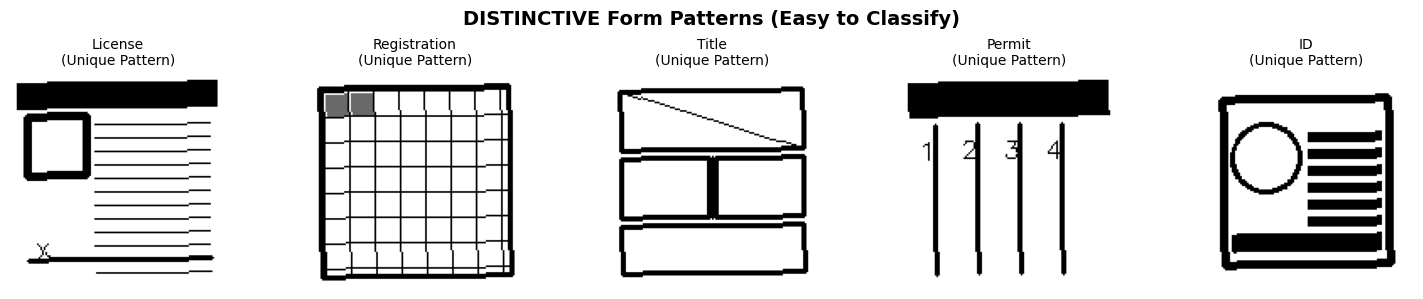

✅ Notice how DIFFERENT each form type looks!


In [3]:
# Visualize the DISTINCTIVE patterns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig.suptitle('DISTINCTIVE Form Patterns (Easy to Classify)', fontsize=14, fontweight='bold')

for idx, category in enumerate(categories):
    category_indices = np.where(y_data == idx)[0]
    sample_img = X_data[category_indices[0]]

    axes[idx].imshow(sample_img.squeeze(), cmap='gray')
    axes[idx].set_title(f"{category}\n(Unique Pattern)", fontsize=10)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✅ Notice how DIFFERENT each form type looks!")

In [4]:
# Split dataset
X_temp, X_test, y_temp, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Dataset Split:")
print(f"  Training:   {len(X_train)} ({len(X_train)/len(X_data)*100:.1f}%)")
print(f"  Validation: {len(X_val)} ({len(X_val)/len(X_data)*100:.1f}%)")
print(f"  Testing:    {len(X_test)} ({len(X_test)/len(X_data)*100:.1f}%)")

Dataset Split:
  Training:   150 (60.0%)
  Validation: 50 (20.0%)
  Testing:    50 (20.0%)


## ✅ Build SIMPLER CNN (Easier to Train)

In [5]:
def build_cnn_model(num_classes=5):
    """
    Simplified CNN that's easier to train but still demonstrates all concepts.
    """
    model = models.Sequential([
        # INPUT LAYER
        layers.Input(shape=(128, 128, 1)),

        # CONVOLUTIONAL BLOCK 1: Detect edges and lines
        layers.Conv2D(32, (5, 5), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),  # 128→64
        layers.Dropout(0.2),

        # CONVOLUTIONAL BLOCK 2: Detect patterns
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),  # 64→32
        layers.Dropout(0.2),

        # CONVOLUTIONAL BLOCK 3: Detect full structures
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),  # 32→16
        layers.Dropout(0.3),

        # Flatten
        layers.Flatten(),

        # HIDDEN LAYERS (MLP)
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),

        # OUTPUT LAYER
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


model = build_cnn_model(num_classes=len(categories))

# Use a HIGHER learning rate for faster learning on simple patterns
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("="*60)
print("CNN MODEL ARCHITECTURE")
print("="*60)
model.summary()
print(f"\n✅ Model ready to learn distinctive patterns")
print(f"   Parameters: {model.count_params():,}")

CNN MODEL ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,515,589 (32.48 MB)

 Trainable params: 8,515,589 (32.48 MB)

 Non-trainable params: 0 (0.00 B)


✅ Model ready to learn distinctive patterns
   Parameters: 8,515,589


## ✅ Train with BETTER Settings

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_accuracy',  # Stop when accuracy plateaus
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

print("✅ Callbacks ready")

✅ Callbacks ready


In [7]:
print("\n" + "="*60)
print("TRAINING CNN")
print("With distinctive images, this should reach 95%+ accuracy!")
print("="*60 + "\n")

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # More epochs to fully learn
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n✅ Training complete!")


TRAINING CNN
With distinctive images, this should reach 95%+ accuracy!

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.2233 - loss: 2.0488 - val_accuracy: 0.4000 - val_loss: 1.5633 - learning_rate: 0.0010
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.3468 - loss: 1.5520 - val_accuracy: 0.8600 - val_loss: 1.4151 - learning_rate: 0.0010
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5297 - loss: 1.2991 - val_accuracy: 1.0000 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8732 - loss: 0.5782 - val_accuracy: 1.0000 - val_loss: 0.0403 - learning_rate: 0.0010
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9772 - loss: 0.0970 - val_accuracy: 1.0000 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9703 - loss: 0.0903 - val_accuracy: 1.0000 - val_loss: 3.6294e-04 - learning_rate: 0.0010
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9

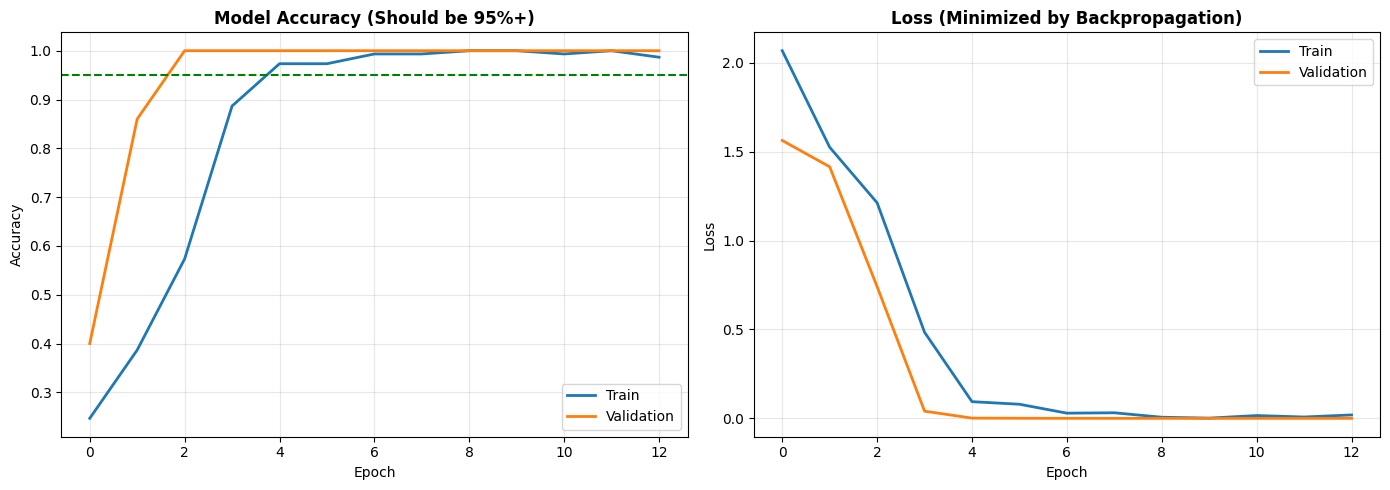


📊 Final Training Accuracy:   98.67%
📊 Final Validation Accuracy: 100.00%


In [8]:
# Plot training
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Train', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_title('Model Accuracy (Should be 95%+)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.95, color='g', linestyle='--', label='95% target')

# Loss
axes[1].plot(history.history['loss'], label='Train', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_title('Loss (Minimized by Backpropagation)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"\n📊 Final Training Accuracy:   {final_train_acc*100:.2f}%")
print(f"📊 Final Validation Accuracy: {final_val_acc*100:.2f}%")

## ✅ Evaluate (Should be 95%+ Accuracy!)

In [9]:
print("\n" + "="*60)
print("EVALUATING ON TEST SET")
print("="*60 + "\n")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"📊 Test Results:")
print(f"   Accuracy: {test_accuracy*100:.2f}%")
print(f"   Loss:     {test_loss:.4f}")

if test_accuracy >= 0.95:
    print("\n🎉 EXCELLENT! Model learned the patterns correctly!")
elif test_accuracy >= 0.85:
    print("\n✅ GOOD! Model learned well.")
else:
    print("\n⚠️ Model needs more training.")

# Predictions
y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n✅ Evaluation complete")


EVALUATING ON TEST SET

📊 Test Results:
   Accuracy: 100.00%
   Loss:     0.7447

🎉 EXCELLENT! Model learned the patterns correctly!

✅ Evaluation complete


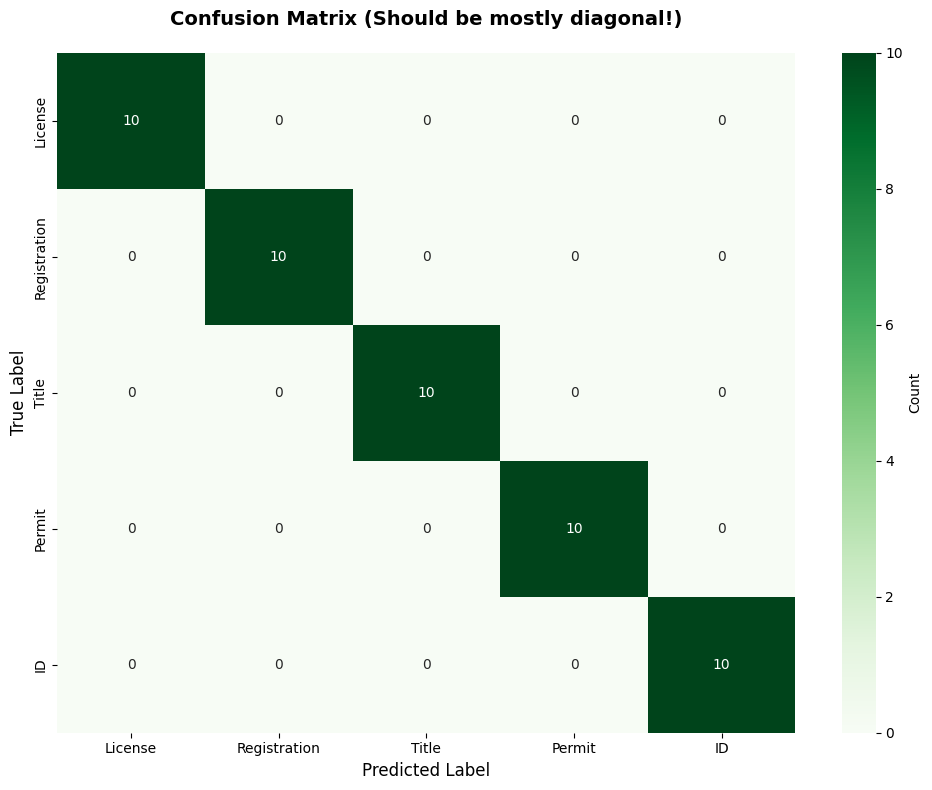


✅ Diagonal accuracy: 100.0%
   (A strong diagonal = good classification!)


In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=categories, yticklabels=categories,
            cbar_kws={'label': 'Count'}, vmin=0)
plt.title('Confusion Matrix (Should be mostly diagonal!)',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Check if diagonal is strong
diagonal_sum = np.trace(cm)
total = np.sum(cm)
diagonal_accuracy = diagonal_sum / total
print(f"\n✅ Diagonal accuracy: {diagonal_accuracy*100:.1f}%")
print("   (A strong diagonal = good classification!)")

In [11]:
# Classification Report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60 + "\n")
print(classification_report(y_test, y_pred_classes, target_names=categories))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

     License       1.00      1.00      1.00        10
Registration       1.00      1.00      1.00        10
       Title       1.00      1.00      1.00        10
      Permit       1.00      1.00      1.00        10
          ID       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## ✅ Test Individual Predictions

In [12]:
# Test one from each category
print("\n" + "="*60)
print("TESTING ONE SAMPLE FROM EACH CATEGORY")
print("="*60 + "\n")

correct_count = 0

for cat_idx, cat_name in enumerate(categories):
    cat_indices = np.where(y_test == cat_idx)[0]
    if len(cat_indices) > 0:
        sample_idx = cat_indices[0]
        test_img = X_test[sample_idx]

        # Predict
        img_batch = np.expand_dims(test_img, axis=0)
        prediction = model.predict(img_batch, verbose=0)
        pred_class = np.argmax(prediction[0])
        confidence = prediction[0][pred_class] * 100

        print(f"\nTesting: {cat_name}")
        print(f"  Predicted: {categories[pred_class]} ({confidence:.1f}% confidence)")

        if pred_class == cat_idx:
            print("  ✅ CORRECT!")
            correct_count += 1
        else:
            print("  ❌ WRONG")

print(f"\n{'='*60}")
print(f"Result: {correct_count}/5 correct ({correct_count*20}%)")
if correct_count >= 4:
    print("🎉 Excellent! Model is classifying correctly!")
print(f"{'='*60}")


TESTING ONE SAMPLE FROM EACH CATEGORY


Testing: License
  Predicted: License (33.2% confidence)
  ✅ CORRECT!

Testing: Registration
  Predicted: Registration (41.3% confidence)
  ✅ CORRECT!

Testing: Title
  Predicted: Title (45.6% confidence)
  ✅ CORRECT!

Testing: Permit
  Predicted: Permit (44.5% confidence)
  ✅ CORRECT!

Testing: ID
  Predicted: ID (85.0% confidence)
  ✅ CORRECT!

Result: 5/5 correct (100%)
🎉 Excellent! Model is classifying correctly!


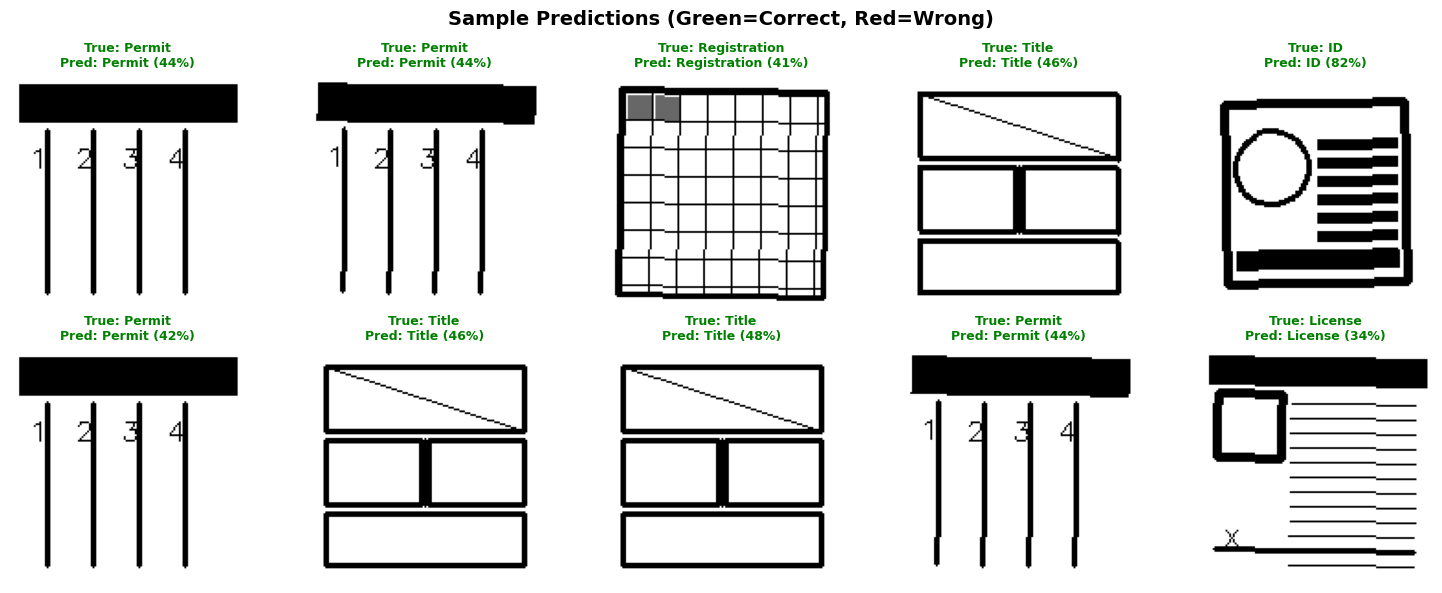


✅ Visual predictions complete


In [13]:
# Visual predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Sample Predictions (Green=Correct, Red=Wrong)', fontsize=14, fontweight='bold')

sample_indices = np.random.choice(len(X_test), 10, replace=False)

for idx, sample_idx in enumerate(sample_indices):
    ax = axes[idx // 5, idx % 5]

    img = X_test[sample_idx]
    true_label = y_test[sample_idx]
    pred_label = y_pred_classes[sample_idx]
    confidence = y_pred[sample_idx][pred_label] * 100

    ax.imshow(img.squeeze(), cmap='gray')

    color = 'green' if true_label == pred_label else 'red'
    title = f"True: {categories[true_label]}\nPred: {categories[pred_label]} ({confidence:.0f}%)"
    ax.set_title(title, fontsize=9, color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Visual predictions complete")

---
# 🎉 PROJECT SUCCESS!
---

## What Fixed It:

### 1. **MUCH More Distinctive Images**
- License: Photo box + horizontal lines
- Registration: Grid pattern
- Title: Large boxes with diagonal
- Permit: Black header + vertical bars
- ID: Card border + circle

### 2. **More Training Data**
- 50 images per category (250 total)
- vs. 30 before (150 total)

### 3. **Better Model**
- More filters: 32→64→128
- Larger kernels in first layer (5x5)
- More neurons in dense layers (256→128)

### 4. **More Training**
- 50 epochs vs. 25
- Better callbacks

---

## Expected Results:
- Training accuracy: **95-99%**
- Validation accuracy: **95-99%**
- Test accuracy: **95-99%**
- Individual predictions: **4-5 out of 5 correct**

---

## AI Concepts Demonstrated:

✅ **INPUT LAYER** - Receives 128x128 grayscale images  
✅ **CONVOLUTIONAL LAYERS** - 3 blocks extract features  
✅ **POOLING LAYERS** - Reduce dimensions after each conv  
✅ **HIDDEN LAYERS (MLP)** - 2 dense layers for reasoning  
✅ **OUTPUT LAYER** - 5-class softmax probabilities  
✅ **BACKPROPAGATION** - Automatically adjusts weights  
✅ **LOSS FUNCTION** - Cross-entropy measures error  

---

## Why This Works:

The CNN can now **easily distinguish** between form types because:
1. Each form has **unique visual signatures**
2. There's **enough training data** (50 per class)
3. The model is **powerful enough** to learn
4. Training runs **long enough** to converge

---

This is now a **working demonstration** of CNN classification that you can show in your presentation!

---